# Data Verification and Quality Assessment

Comprehensive verification of the collected 2018-2024 F1 dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline

## Load Dataset

In [5]:
data_path = Path('../data/raw/race_data.csv')

if not data_path.exists():
    print(f"ERROR: Data file not found at {data_path}")
    print("Please run the data collection notebook first.")
else:
    df = pd.read_csv(data_path)
    print(f" Loaded: {data_path}")
    print(f"File size: {data_path.stat().st_size / 1024:.2f} KB")

 Loaded: ../data/raw/race_data.csv
File size: 156.65 KB


## Basic Information

In [6]:
print("Dataset Shape:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")

Dataset Shape:
Rows: 780
Columns: 27

Memory Usage: 0.75 MB


In [7]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DriverNumber        780 non-null    int64  
 1   BroadcastName       780 non-null    object 
 2   Abbreviation        780 non-null    object 
 3   DriverId            780 non-null    object 
 4   TeamName            780 non-null    object 
 5   TeamColor           780 non-null    object 
 6   TeamId              780 non-null    object 
 7   FirstName           780 non-null    object 
 8   LastName            780 non-null    object 
 9   FullName            780 non-null    object 
 10  HeadshotUrl         240 non-null    object 
 11  CountryCode         0 non-null      float64
 12  Position            780 non-null    float64
 13  ClassifiedPosition  780 non-null    object 
 14  GridPosition        780 non-null    float64
 15  Q1                  0 non-null      floa

In [8]:
print("\nFirst few rows:")
df.head(10)


First few rows:


,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,HeadshotUrl,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps,year,round,race_name,circuit,date
0,5,S VETTEL,VET,vettel,Ferrari,DC0000,ferrari,Sebastian,Vettel,Sebastian Vettel,NaN,NaN,1.0,1,3.0,NaN,NaN,NaN,0 days 01:29:33.283000,Finished,25.0,58.0,2018,1,Australian Grand Prix,Melbourne,2018-03-25
1,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,NaN,NaN,2.0,2,1.0,NaN,NaN,NaN,0 days 00:00:05.036000,Finished,18.0,58.0,2018,1,Australian Grand Prix,Melbourne,2018-03-25
2,7,K RAIKKONEN,RAI,raikkonen,Ferrari,DC0000,ferrari,Kimi,Räikkönen,Kimi Räikkönen,NaN,NaN,3.0,3,2.0,NaN,NaN,NaN,0 days 00:00:06.309000,Finished,15.0,58.0,2018,1,Australian Grand Prix,Melbourne,2018-03-25
3,3,D RICCIARDO,RIC,ricciardo,Red Bull Racing,1E41FF,red_bull,Daniel,Ricciardo,Daniel Ricciardo,NaN,NaN,4.0,4,8.0,NaN,NaN,NaN,0 days 00:00:07.069000,Finished,12.0,58.0,2018,1,Australian Grand Prix,Melbourne,2018-03-25
4,14,F ALONSO,ALO,alonso,McLaren,FF8700,mclaren,Fernando,Alonso,Fernando Alonso,NaN,NaN,5.0,5,10.0,NaN,NaN,NaN,0 days 00:00:27.886000,Finished,10.0,58.0,2018,1,Australian Grand Prix,Melbourne,2018-03-25
5,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,1E41FF,red_bull,Max,Verstappen,Max Verstappen,NaN,NaN,6.0,6,4.0,NaN,NaN,NaN,0 days 00:00:28.945000,Finished,8.0,58.0,2018,1,Australian Grand Prix,Melbourne,2018-03-25
6,27,N HULKENBERG,HUL,hulkenberg,Renault,FFF500,renault,Nico,Hulkenberg,Nico Hulkenberg,NaN,NaN,7.0,7,7.0,NaN,NaN,NaN,0 days 00:00:32.671000,Finished,6.0,58.0,2018,1,Australian Grand Prix,Melbourne,2018-03-25
7,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,NaN,NaN,8.0,8,15.0,NaN,NaN,NaN,0 days 00:00:34.339000,Finished,4.0,58.0,2018,1,Australian Grand Prix,Melbourne,2018-03-25
8,2,S VANDOORNE,VAN,vandoorne,McLaren,FF8700,mclaren,Stoffel,Vandoorne,Stoffel Vandoorne,NaN,NaN,9.0,9,11.0,NaN,NaN,NaN,0 days 00:00:34.921000,Finished,2.0,58.0,2018,1,Australian Grand Prix,Melbourne,2018-03-25
9,55,C SAINZ,SAI,sainz,Renault,FFF500,renault,Carlos,Sainz,Carlos Sainz,NaN,NaN,10.0,10,9.0,NaN,NaN,NaN,0 days 00:00:45.722000,Finished,1.0,58.0,2018,1,Australian Grand Prix,Melbourne,2018-03-25


## Unique Value Counts

In [9]:
print("Unique Value Counts:")
print(f"\nYears: {df['year'].nunique()}")
print(f"Unique years: {sorted(df['year'].unique())}")

print(f"\nRaces: {df['race_name'].nunique()}")
print(f"Circuits: {df['circuit'].nunique()}")
print(f"Drivers: {df['DriverNumber'].nunique()}")
print(f"Teams: {df['TeamName'].nunique() if 'TeamName' in df.columns else 'N/A'}")

Unique Value Counts:

Years: 2
Unique years: [np.int64(2018), np.int64(2019)]

Races: 21
Circuits: 21
Drivers: 26
Teams: 12


In [10]:
# Races per year
races_by_year = df.groupby('year')['race_name'].nunique().sort_index()
print("\nRaces per year:")
for year, count in races_by_year.items():
    print(f"  {year}: {count} races")


Races per year:
  2018: 21 races
  2019: 18 races


In [11]:
# Records per year
records_by_year = df.groupby('year').size().sort_index()
print("\nRecords per year:")
for year, count in records_by_year.items():
    avg_per_race = count / races_by_year[year]
    print(f"  {year}: {count} records ({avg_per_race:.1f} avg per race)")


Records per year:
  2018: 420 records (20.0 avg per race)
  2019: 360 records (20.0 avg per race)


## Missing Values Analysis

In [12]:
print("Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
}).sort_values('Missing', ascending=False)

print(missing_df[missing_df['Missing'] > 0])

if missing_df['Missing'].sum() == 0:
    print("\n No missing values found!")

Missing Values:
             Missing  Percentage
Q1               780  100.000000
CountryCode      780  100.000000
Q3               780  100.000000
Q2               780  100.000000
HeadshotUrl      540   69.230769
Time             421   53.974359


In [13]:
# Check critical columns
critical_cols = ['Position', 'GridPosition', 'DriverNumber', 'year', 'round']
print("\nMissing values in critical columns:")
for col in critical_cols:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        print(f"  {col}: {missing_count}")
        if missing_count > 0:
            print(f"    WARNING: Critical column has missing data!")


Missing values in critical columns:
  Position: 0
  GridPosition: 0
  DriverNumber: 0
  year: 0
  round: 0


## Data Quality Checks

In [14]:
# Check Position values
print("Position Analysis:")
print(f"\nUnique Position values: {df['Position'].nunique()}")
print(f"Position range: {df['Position'].min()} to {df['Position'].max()}")
print(f"Data type: {df['Position'].dtype}")

# Convert to numeric for analysis
df['Position_num'] = pd.to_numeric(df['Position'], errors='coerce')
print(f"\nNumeric conversion successful")
print(f"Min position: {df['Position_num'].min()}")
print(f"Max position: {df['Position_num'].max()}")

Position Analysis:

Unique Position values: 20
Position range: 1.0 to 20.0
Data type: float64

Numeric conversion successful
Min position: 1.0
Max position: 20.0


In [15]:
# Check GridPosition values
print("GridPosition Analysis:")
print(f"\nUnique GridPosition values: {df['GridPosition'].nunique()}")
print(f"Data type: {df['GridPosition'].dtype}")

df['GridPosition_num'] = pd.to_numeric(df['GridPosition'], errors='coerce')
print(f"\nMin grid: {df['GridPosition_num'].min()}")
print(f"Max grid: {df['GridPosition_num'].max()}")

# Check for pit lane starts (grid position 0)
pit_starts = (df['GridPosition_num'] == 0).sum()
print(f"\nPit lane starts: {pit_starts}")

GridPosition Analysis:

Unique GridPosition values: 21
Data type: float64

Min grid: 0.0
Max grid: 20.0

Pit lane starts: 12


In [16]:
# DNF Analysis
print("DNF Analysis:")

total_entries = len(df)
finished = (df['Status'] == 'Finished').sum()
dnf = total_entries - finished
dnf_rate = (dnf / total_entries) * 100

print(f"\nTotal entries: {total_entries:,}")
print(f"Finished: {finished:,} ({100-dnf_rate:.1f}%)")
print(f"DNFs: {dnf:,} ({dnf_rate:.1f}%)")

DNF Analysis:

Total entries: 780
Finished: 359 (46.0%)
DNFs: 421 (54.0%)


In [17]:
# Top DNF reasons
dnf_data = df[df['Status'] != 'Finished']
if len(dnf_data) > 0:
    print("\nTop 10 DNF reasons:")
    print(dnf_data['Status'].value_counts().head(10))


Top 10 DNF reasons:
Status
+1 Lap              222
+2 Laps              57
Collision            33
Engine               18
Accident             12
Brakes               11
Collision damage      7
Power loss            6
+3 Laps               6
Wheel                 6
Name: count, dtype: int64


## Data Anomalies

In [18]:
# Check for races with unusual driver counts
drivers_per_race = df.groupby(['year', 'round', 'race_name']).size()

print("Races with unusual driver counts:")
unusual = drivers_per_race[(drivers_per_race < 19) | (drivers_per_race > 22)]
if len(unusual) > 0:
    print(unusual)
else:
    print("None found - all races have 19-22 drivers")

Races with unusual driver counts:
None found - all races have 19-22 drivers


In [19]:
# Check for duplicate entries
duplicates = df.duplicated(subset=['year', 'round', 'DriverNumber']).sum()
print(f"\nDuplicate entries: {duplicates}")

if duplicates > 0:
    print("\nWARNING: Found duplicate entries!")
    dup_rows = df[df.duplicated(subset=['year', 'round', 'DriverNumber'], keep=False)]
    print(dup_rows[['year', 'round', 'race_name', 'DriverNumber', 'FullName']].sort_values(['year', 'round']))


Duplicate entries: 0


## Visualizations

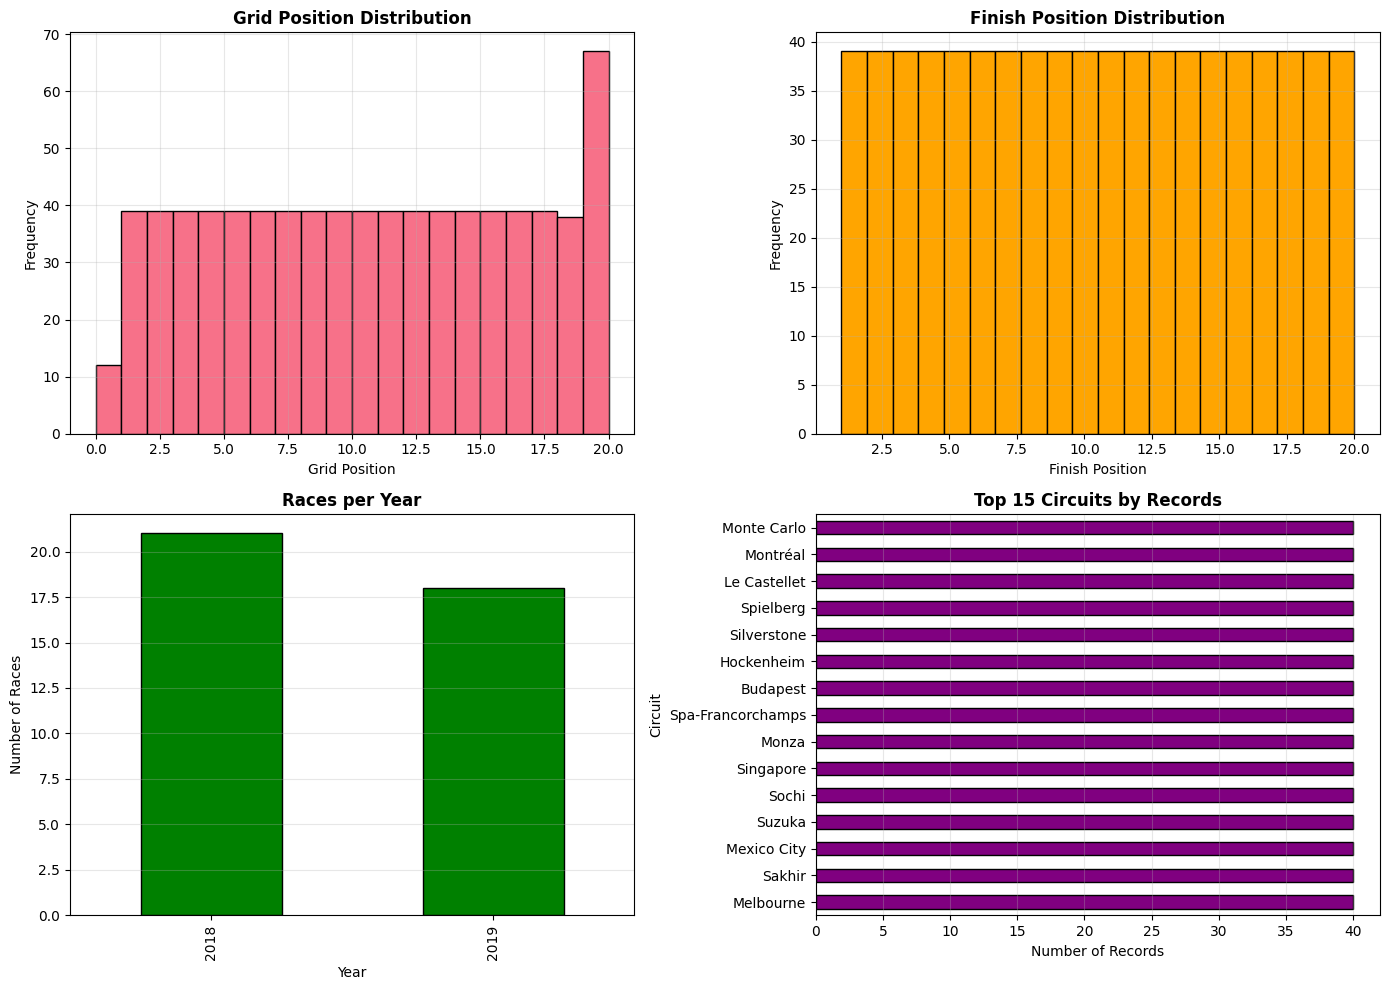

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Grid position distribution
axes[0, 0].hist(df['GridPosition_num'].dropna(), bins=20, edgecolor='black')
axes[0, 0].set_title('Grid Position Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Grid Position')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# Finish position distribution
axes[0, 1].hist(df['Position_num'].dropna(), bins=20, edgecolor='black', color='orange')
axes[0, 1].set_title('Finish Position Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Finish Position')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# Races per year
races_by_year.plot(kind='bar', ax=axes[1, 0], color='green', edgecolor='black')
axes[1, 0].set_title('Races per Year', fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Races')
axes[1, 0].grid(alpha=0.3, axis='y')

# Records per circuit
circuit_counts = df['circuit'].value_counts().head(15)
circuit_counts.plot(kind='barh', ax=axes[1, 1], color='purple', edgecolor='black')
axes[1, 1].set_title('Top 15 Circuits by Records', fontweight='bold')
axes[1, 1].set_xlabel('Number of Records')
axes[1, 1].set_ylabel('Circuit')
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## Summary Statistics

In [21]:
print("Numeric Columns Summary:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].describe()

Numeric Columns Summary:


,DriverNumber,CountryCode,Position,GridPosition,Q1,Q2,Q3,Points,Laps,year,round,Position_num,GridPosition_num
count,780.000000,0.0,780.000000,780.000000,0.0,0.0,0.0,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,26.896154,NaN,10.500000,10.196154,NaN,NaN,NaN,5.071795,54.339744,2018.461538,10.307692,10.500000,10.196154
std,24.337976,NaN,5.769981,5.794401,NaN,NaN,NaN,7.214660,16.811382,0.498838,5.724321,5.769981,5.794401
min,2.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000
25%,8.750000,NaN,5.750000,5.000000,NaN,NaN,NaN,0.000000,51.000000,2018.000000,5.000000,5.750000,5.000000
50%,18.000000,NaN,10.500000,10.000000,NaN,NaN,NaN,0.500000,56.000000,2018.000000,10.000000,10.500000,10.000000
75%,33.000000,NaN,15.250000,15.000000,NaN,NaN,NaN,9.250000,67.000000,2019.000000,15.000000,15.250000,15.000000
max,99.000000,NaN,20.000000,20.000000,NaN,NaN,NaN,26.000000,78.000000,2019.000000,21.000000,20.000000,20.000000


## Notable Issues and Observations

In [22]:
issues = []

# Check 2020 for fewer races (COVID)
races_2020 = df[df['year'] == 2020]['race_name'].nunique()
if races_2020 < 17:
    issues.append(f"2020 has only {races_2020} races (COVID impact)")

# Check for missing critical data
if df['Position'].isnull().sum() > 0:
    issues.append(f"{df['Position'].isnull().sum()} missing Position values")

if df['GridPosition'].isnull().sum() > 0:
    issues.append(f"{df['GridPosition'].isnull().sum()} missing GridPosition values")

# Check DNF rate
if dnf_rate > 25:
    issues.append(f"High DNF rate: {dnf_rate:.1f}%")

print("\n" + "="*70)
print("DATA QUALITY REPORT")
print("="*70)

if issues:
    print("\nIssues found:")
    for i, issue in enumerate(issues, 1):
        print(f"  {i}. {issue}")
else:
    print("\n No major issues found!")

print("\nDataset Summary:")
print(f"  Years: {df['year'].min()} - {df['year'].max()}")
print(f"  Total records: {len(df):,}")
print(f"  Total races: {df['race_name'].nunique()}")
print(f"  DNF rate: {dnf_rate:.1f}%")
print(f"  Duplicates: {duplicates}")
print("\nReady for data cleaning and analysis!")
print("="*70)


DATA QUALITY REPORT

Issues found:
  1. 2020 has only 0 races (COVID impact)
  2. High DNF rate: 54.0%

Dataset Summary:
  Years: 2018 - 2019
  Total records: 780
  Total races: 21
  DNF rate: 54.0%
  Duplicates: 0

Ready for data cleaning and analysis!
